In [8]:
import pandas as pd
import matplotlib.pyplot as plt
rawdf_train = pd.read_csv('../GiftPrices/train.csv')
rawdf_test = pd.read_csv('../GiftPrices/test.csv')
rawdf_train.head()

,gift_id,gift_type,gift_category,gift_cluster,instock_date,stock_update_date,lsg_1,lsg_2,lsg_3,lsg_4,lsg_5,lsg_6,uk_date1,uk_date2,is_discounted,volumes,price
0,GF_11156,61,534,3942,2014-02-21 05:07:06.000,2016-11-09 15:49:51.000,3377,5221,504,1912,10,554,2014-02-24 08:07:06.000,2014-02-24 07:07:06.000,0,NaN,175.54
1,GF_11157,61,534,3942,2014-02-21 06:07:06.000,2016-11-11 13:49:51.000,3377,5221,504,1912,10,554,2014-02-22 07:07:06.000,2014-02-24 06:07:06.000,1,NaN,95.80
2,GF_15689,584,262,0,2014-02-21 09:30:21.000,2016-03-24 14:46:18.000,5290,1579,3203,1912,9,1578,2016-01-26 00:04:45.000,2016-03-18 02:00:00.000,1,NaN,107.35
3,GF_11155,61,534,3942,2014-02-22 05:07:06.000,2016-11-10 16:49:51.000,3377,5221,504,1912,10,554,2016-11-07 13:49:51.000,2016-11-06 04:00:00.000,0,NaN,172.90
4,GF_11158,61,534,3942,2014-02-22 07:07:06.000,2016-11-10 13:49:51.000,3377,5221,504,1912,9,554,2016-11-07 15:49:51.000,2016-11-06 01:00:00.000,1,NaN,77.72


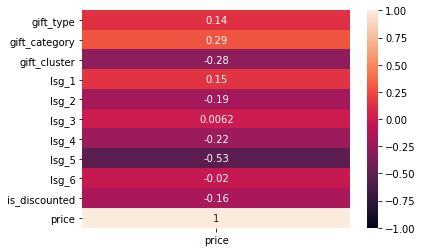

In [9]:
rawdf_train = rawdf_train.drop('volumes', axis=1)

import seaborn as sns
sns.heatmap(rawdf_train.corr()[['price']], annot=True, vmin=-1, vmax=1)

In [10]:
from datetime import datetime

import calendar


def getGoodFridayDate(y):
    c = calendar.Calendar(firstweekday=calendar.FRIDAY)

    year = y; month = 4

    monthcal = c.monthdatescalendar(year,month)
    first_friday = [day for week in monthcal for day in week if \
                    day.weekday() == calendar.FRIDAY and \
                    day.month == month][0]
    first_friday = datetime.combine(first_friday, datetime.min.time())
    
    return first_friday

def getGoodFridayDiff(givenDate):
    givenDatemonth = givenDate.month
    if givenDatemonth < 4:
        friday_date = getGoodFridayDate(givenDate.year)
    else:
        friday_date = getGoodFridayDate(givenDate.year+1)
    diff = abs(givenDate - friday_date)
    return diff


In [11]:
rawdf_train['stock_update_date'] = rawdf_train['stock_update_date'].apply(lambda x: x.split()[0])
rawdf_train['uk_date1'] = rawdf_train['uk_date1'].apply(lambda x: x.split()[0])
rawdf_train['uk_date2'] = rawdf_train['uk_date2'].apply(lambda x: x.split()[0])

rawdf_test['stock_update_date'] = rawdf_test['stock_update_date'].apply(lambda x: x.split()[0])
rawdf_test['uk_date1'] = rawdf_test['uk_date1'].apply(lambda x: x.split()[0])
rawdf_test['uk_date2'] = rawdf_test['uk_date2'].apply(lambda x: x.split()[0])
rawdf_train.head()

,gift_id,gift_type,gift_category,gift_cluster,instock_date,stock_update_date,lsg_1,lsg_2,lsg_3,lsg_4,lsg_5,lsg_6,uk_date1,uk_date2,is_discounted,price
0,GF_11156,61,534,3942,2014-02-21 05:07:06.000,2016-11-09,3377,5221,504,1912,10,554,2014-02-24,2014-02-24,0,175.54
1,GF_11157,61,534,3942,2014-02-21 06:07:06.000,2016-11-11,3377,5221,504,1912,10,554,2014-02-22,2014-02-24,1,95.80
2,GF_15689,584,262,0,2014-02-21 09:30:21.000,2016-03-24,5290,1579,3203,1912,9,1578,2016-01-26,2016-03-18,1,107.35
3,GF_11155,61,534,3942,2014-02-22 05:07:06.000,2016-11-10,3377,5221,504,1912,10,554,2016-11-07,2016-11-06,0,172.90
4,GF_11158,61,534,3942,2014-02-22 07:07:06.000,2016-11-10,3377,5221,504,1912,9,554,2016-11-07,2016-11-06,1,77.72


In [12]:
date_columns = ['stock_update_date', 'uk_date1', 'uk_date2']
for date_col in date_columns:
    rawdf_train[date_col] = rawdf_train[date_col].apply(lambda x: datetime.strptime(x, "%Y-%m-%d"))
    rawdf_test[date_col] = rawdf_test[date_col].apply(lambda x: datetime.strptime(x, "%Y-%m-%d"))

In [13]:
for date_col in date_columns:
    rawdf_train[date_col] = rawdf_train[date_col].apply(lambda x: float(str(getGoodFridayDiff(x)).split()[0]))
    rawdf_test[date_col] = rawdf_test[date_col].apply(lambda x: float(str(getGoodFridayDiff(x)).split()[0]))
rawdf_train.head()

,gift_id,gift_type,gift_category,gift_cluster,instock_date,stock_update_date,lsg_1,lsg_2,lsg_3,lsg_4,lsg_5,lsg_6,uk_date1,uk_date2,is_discounted,price
0,GF_11156,61,534,3942,2014-02-21 05:07:06.000,149.0,3377,5221,504,1912,10,554,39.0,39.0,0,175.54
1,GF_11157,61,534,3942,2014-02-21 06:07:06.000,147.0,3377,5221,504,1912,10,554,41.0,39.0,1,95.80
2,GF_15689,584,262,0,2014-02-21 09:30:21.000,8.0,5290,1579,3203,1912,9,1578,66.0,14.0,1,107.35
3,GF_11155,61,534,3942,2014-02-22 05:07:06.000,148.0,3377,5221,504,1912,10,554,151.0,152.0,0,172.90
4,GF_11158,61,534,3942,2014-02-22 07:07:06.000,148.0,3377,5221,504,1912,9,554,151.0,152.0,1,77.72


In [14]:
rawdf_test.head()

,gift_id,gift_type,gift_category,gift_cluster,instock_date,stock_update_date,lsg_1,lsg_2,lsg_3,lsg_4,lsg_5,lsg_6,uk_date1,uk_date2,is_discounted,volumes
0,GF_2372,842,663,24,2016-11-12 13:49:12.000,142.0,203,1334,4358,1912,10,1899,142.0,145.0,0,NaN
1,GF_13040,407,534,754,2016-11-12 13:49:22.000,141.0,4785,5940,2582,1912,10,1488,146.0,155.0,0,NaN
2,GF_5754,631,433,6012,2016-11-12 13:49:23.000,142.0,1812,5027,3427,1912,10,1913,143.0,157.0,1,NaN
3,GF_1417,992,433,6358,2016-11-12 13:49:24.000,142.0,2002,6883,5537,1912,10,1734,144.0,154.0,0,NaN
4,GF_23204,43,534,6123,2016-11-12 13:49:40.000,140.0,1512,6883,610,1912,9,150,144.0,156.0,1,NaN


In [15]:
from sklearn.preprocessing import StandardScaler
df_train = rawdf_train.copy()
df_test = rawdf_test.copy()

# features that need to be scaled
ss = StandardScaler()
scale_features = ['gift_type', 'gift_category', 'gift_cluster', 'lsg_1', 
                  'lsg_2', 'lsg_3', 'lsg_3','lsg_4', 'lsg_5',
                 'lsg_6', 'stock_update_date', 'uk_date1', 'uk_date2']
df_train[scale_features] = ss.fit_transform(df_train[scale_features])

In [16]:
df_test[scale_features] = ss.fit_transform(df_test[scale_features])
df_train.head()

,gift_id,gift_type,gift_category,gift_cluster,instock_date,stock_update_date,lsg_1,lsg_2,lsg_3,lsg_4,lsg_5,lsg_6,uk_date1,uk_date2,is_discounted,price
0,GF_11156,-1.743427,0.594832,0.251333,2014-02-21 05:07:06.000,-0.092915,-0.716765,0.454254,-1.607695,0.479419,0.573485,-1.020173,-1.043958,-0.872458,0,175.54
1,GF_11157,-1.743427,0.594832,0.251333,2014-02-21 06:07:06.000,-0.108760,-0.716765,0.454254,-1.607695,0.479419,0.573485,-1.020173,-1.027396,-0.872458,1,95.80
2,GF_15689,-0.399670,-0.562260,-1.300013,2014-02-21 09:30:21.000,-1.209976,-0.009098,-1.146752,-0.613145,0.479419,0.147832,0.447252,-0.820369,-1.089780,1,107.35
3,GF_11155,-1.743427,0.594832,0.251333,2014-02-22 05:07:06.000,-0.100837,-0.716765,0.454254,-1.607695,0.479419,0.573485,-1.020173,-0.116476,0.109838,0,172.90
4,GF_11158,-1.743427,0.594832,0.251333,2014-02-22 07:07:06.000,-0.100837,-0.716765,0.454254,-1.607695,0.479419,0.147832,-1.020173,-0.116476,0.109838,1,77.72


In [17]:
from sklearn.model_selection import train_test_split
X = df_train.drop(['price','gift_id', 'instock_date'], axis=1).values
y = df_train['price'].values
import numpy as np

X = np.asarray(X).astype(np.float32)
y = np.asarray(y).astype(np.float32)
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

In [18]:
X_test = df_test.drop(['volumes','gift_id', 'instock_date'], axis=1).values

In [21]:
def plot_loss(history):
    historydf = pd.DataFrame(history.history, index=history.epoch)
    plt.figure(figsize=(8, 6))
    historydf.plot(ylim=(0, historydf.values.max()))
    plt.title('Loss: %.3f' % history.history['loss'][-1])

In [29]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import InverseTimeDecay
from tensorflow.keras.callbacks import EarlyStopping

# with early stopping

def build_model():
    deep_model = Sequential()
    deep_model.add(Dense(128, input_shape=(X.shape[1],), activation='relu'))
    deep_model.add(Dropout(0.5))
    deep_model.add(Dense(64, activation='relu'))
    deep_model.add(Dropout(0.5))
    deep_model.add(Dense(32, activation='relu'))
    deep_model.add(Dropout(0.5))
    deep_model.add(Dense(16, activation='relu'))
    deep_model.add(Dense(1))

    
    
    lr_schedule = InverseTimeDecay(
        0.001,
        decay_steps=30000,
        decay_rate=1,
        staircase=False)
    
    optimizer = Adam(lr_schedule)

    deep_model.compile(loss='mae',
                    optimizer=optimizer,
                    metrics=['mae', 'mse'])
    
    return deep_model



In [30]:
model = build_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 128)               1792      
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_5 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 16)               


Epoch: 0, loss:66.4758,  mae:66.4758,  mse:40497.0859,  val_loss:56.1368,  val_mae:56.1368,  val_mse:10715.0635,  
....................................................................................................
Epoch: 100, loss:63.6382,  mae:63.6382,  mse:38791.6914,  val_loss:57.9893,  val_mae:57.9893,  val_mse:11051.3066,  
....................................................................................................
Epoch: 200, loss:62.9606,  mae:62.9606,  mse:38011.0195,  val_loss:58.9210,  val_mae:58.9210,  val_mse:11200.9004,  
....

<Figure size 576x432 with 0 Axes>

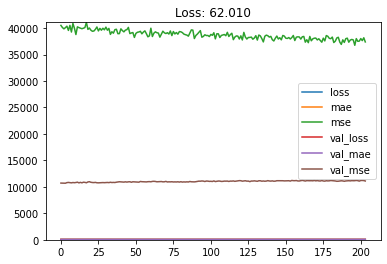

In [37]:
# The patience parameter is the amount of epochs to check for improvement
EPOCHS = 5000
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling
early_stop = EarlyStopping(monitor='val_mae', patience=200)
early_history = model.fit(X, y, epochs=EPOCHS, validation_split = 0.3, verbose=0, 
                    callbacks=[early_stop, tfdocs.modeling.EpochDots()])

plot_loss(early_history)

In [38]:
test_predictions = model.predict(X_test).flatten()

In [39]:
len(test_predictions)

13519

In [40]:
submission_df = pd.DataFrame()
submission_df['gift_id'] = rawdf_test['gift_id']
submission_df['price'] = test_predictions

In [41]:
submission_df.to_csv('../test_161839.csv', index=False)